# COURSE: A deep understanding of deep learning
## SECTION: Math prerequisites
### LECTURE: Softmax
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [2]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 5.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import numpy as np
import torch #Importing pytorch library
import torch.nn as nn #Importing neural network library
import matplotlib.pyplot as plt

In [4]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result (ez(i)/sigma e(z) )
num = np.exp(z) #Goes through each z to do it
den = np.sum( np.exp(z) )
sigma = num / den #(calculates sigma for each element i in z)

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[12 12  8 -1 -3 -2  5 -5 -5  1 -5 -3 -3  2  7  6  5 -5  3  7 11 -5 -5 10
 14]


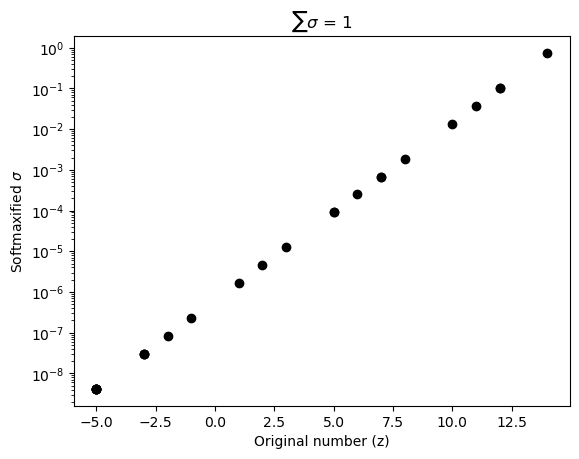

In [9]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z, sigma, 'ko') #'ko': A format string where 'k' stands for black color (k from CMYK color model) and 'o' indicates that the points should be marked as circles.
plt.xlabel('Original number (z)') 
plt.ylabel('Softmaxified $\\sigma$')  # Doubled backslash alogn with the Latex notation.#The %g is a placeholder for a floating-point number.
plt.yscale('log')
plt.title('$\\sum\\sigma$ = %g' % np.sum(sigma))  # Doubled backslash
plt.show()


# Using pytorch

In [4]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([4.1809e-03, 1.8981e-07, 6.9828e-08, 1.4025e-06, 2.2827e-01, 5.1596e-07,
        2.5688e-08, 1.8981e-07, 6.9828e-08, 8.3976e-02, 3.0893e-02, 5.1596e-07,
        1.0363e-05, 6.2050e-01, 1.4025e-06, 1.4025e-06, 1.4025e-06, 2.0816e-04,
        6.9828e-08, 2.0816e-04, 5.6582e-04, 3.0893e-02, 1.4025e-06, 2.0816e-04,
        7.6576e-05])


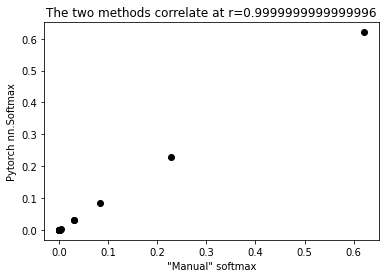

In [5]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()